### Visualising

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
file_path = 'C:\\Users\\Admin\\Desktop\\Code\\brexit.gpkg'
dataset = gpd.read_file(file_path).set_index('LAD14CD', drop=False)
dataset.head()

,OBJECTID,LAD14CD,LAD14NM,LAD14NMW,id,Region_Cod,Region,Area,Electorate,ExpectedBa,...,Leave,Rejected_B,No_officia,Voting_for,Writing_or,Unmarked_o,Pct_Remain,Pct_Leave,Pct_Reject,geometry
LAD14CD,,,,,,,,,,,,,,,,,,,,,
E06000001,1,E06000001,Hartlepool,NaN,70,E12000001,North East,Hartlepool,70341,46137,...,32071,34,0,12,6,16,30.43,69.57,0.07,"MULTIPOLYGON (((-141202.225 7308889.307, -1411..."
E06000002,2,E06000002,Middlesbrough,NaN,71,E12000001,North East,Middlesbrough,94612,61395,...,40177,35,0,16,1,18,34.52,65.48,0.06,"MULTIPOLYGON (((-139272.615 7282988.170, -1390..."
E06000003,3,E06000003,Redcar and Cleveland,NaN,72,E12000001,North East,Redcar and Cleveland,103529,72741,...,48128,27,0,6,0,21,33.81,66.19,0.04,"MULTIPOLYGON (((-126494.218 7293275.078, -1264..."
E06000004,4,E06000004,Stockton-on-Tees,NaN,73,E12000001,North East,Stockton-on-Tees,141486,100462,...,61982,45,2,13,2,28,38.27,61.73,0.04,"MULTIPOLYGON (((-146637.970 7293230.452, -1466..."
E06000005,5,E06000005,Darlington,NaN,74,E12000001,North East,Darlington,77662,55194,...,30994,29,0,0,0,29,43.82,56.18,0.05,"MULTIPOLYGON (((-182304.320 7287910.300, -1823..."


In [14]:
numeric_data = dataset[['LAD14CD','Electorate','ExpectedBa','VerifiedBa','Votes_Cast','Valid_Vote','Remain','Leave','geometry']]

Histogram (Assignment2)

In [1]:
import seaborn as sns

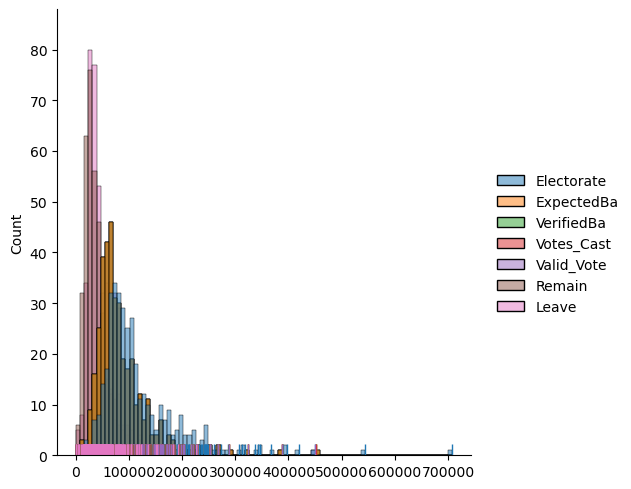

In [15]:
a = sns.displot(numeric_data, kde=False, rug=True)

<Axes: xlabel='Electorate', ylabel='Count'>

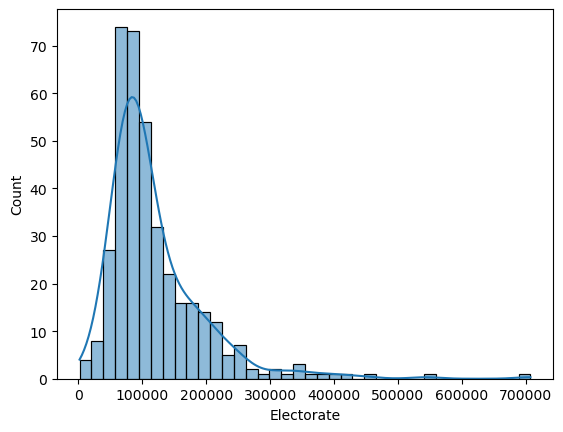

In [16]:
sns.histplot(numeric_data['Electorate'], kde=True)

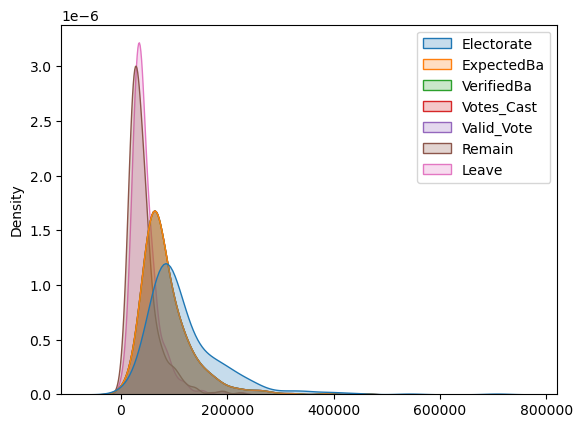

In [17]:
b = sns.kdeplot(numeric_data, fill=True)

Bar and Line Plots

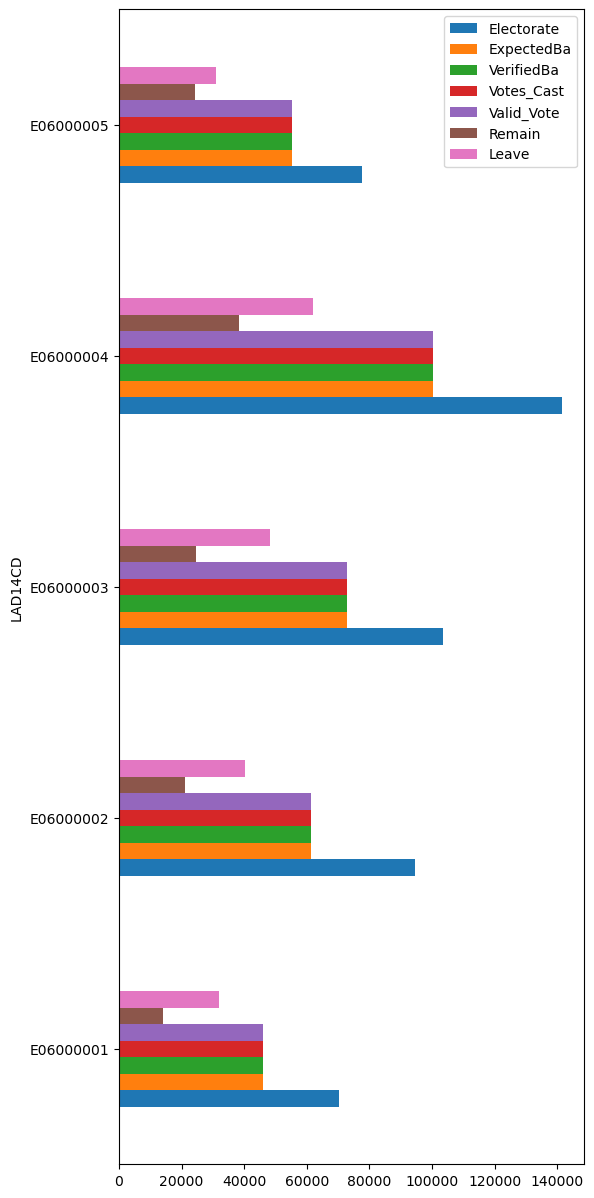

In [20]:
c = numeric_data.head().plot(kind='barh', x='LAD14CD',figsize=(6,15))

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, 'S12000011'),
  Text(0.0, 0, 'E06000001'),
  Text(50.0, 0, 'E06000052'),
  Text(100.0, 0, 'E07000068'),
  Text(150.0, 0, 'E07000122'),
  Text(200.0, 0, 'E07000178'),
  Text(250.0, 0, 'E07000237'),
  Text(300.0, 0, 'E09000008'),
  Text(350.0, 0, 'S12000038'),
  Text(400.0, 0, '')])

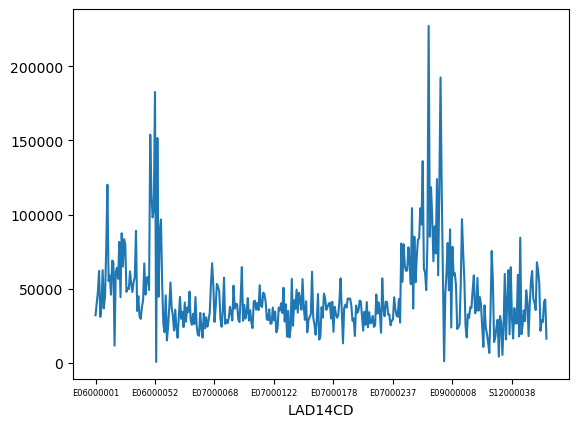

In [21]:
d = numeric_data['Leave'].plot(kind='line')
plt.xticks(fontsize=6)

In [22]:
# save the plot
# plt.savefig('C:\\Users\\Admin\\Desktop\\File_name.png', dpi=300)

Polygon plot

In [24]:
import contextily as ctx


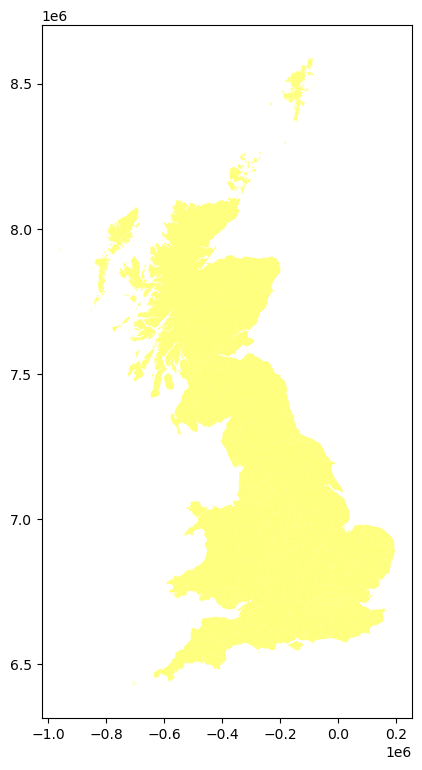

In [23]:
ax = dataset.plot(figsize=(9,9), alpha=0.5, color='yellow')
# 'alpha' indicates transparency 

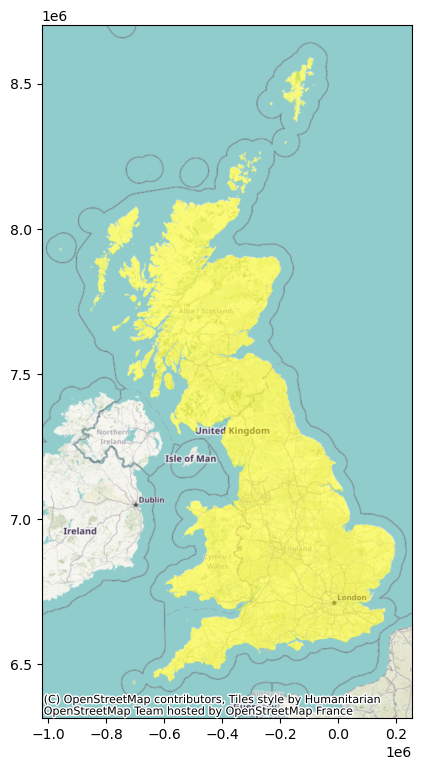

In [26]:
# Add background map, expressing target CRS so the basemap can be reprojected (warped)
ax = dataset.plot(figsize=(9,9), alpha=0.5, color='yellow');
ctx.add_basemap(ax, crs=dataset.crs)

Choropleth map

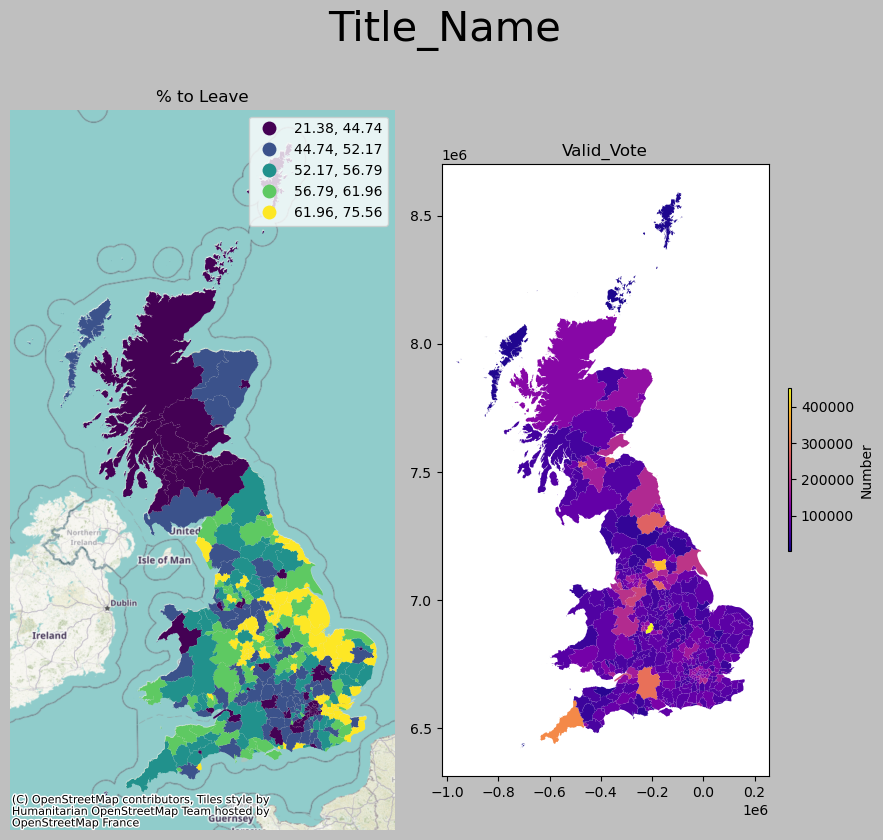

In [52]:
# Set up figure and axis
f, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 9)) # 2graphs, index=1, columns=2

# Plot '% to leave' and 'Valid_Vote'
# First plot: '% to Leave'
dataset.plot(column='Pct_Leave', scheme='Quantiles', legend=True, ax=ax1)
ax1.set_title('% to Leave')
# remove axis frame
ax1.set_axis_off()
# Add background map
ctx.add_basemap(ax1, crs=dataset.crs)

# Second plot: 'Valid_Vote'
dataset.plot(column='Valid_Vote', cmap='plasma', legend=True, ax=ax2, 
             legend_kwds={
                 'shrink': 0.2, 'fraction': 0.1,  # the size of colorbar: 20%
                 'label': "Number",  # Add legend to colorbar
                 'orientation': "vertical",  # or set 'horizontal'
                 'aspect': 50 # aspect ratio
         })
ax2.set_title('Valid_Vote')
# ax2.set_axis_off()
# Add background map
# ctx.add_basemap(ax2, crs=dataset.crs)

# Title
f.suptitle('Title_Name', size=30)
# Change background color of the figure
f.set_facecolor('0.75')

# Adjust layout
plt.tight_layout()
# Draw
plt.show()

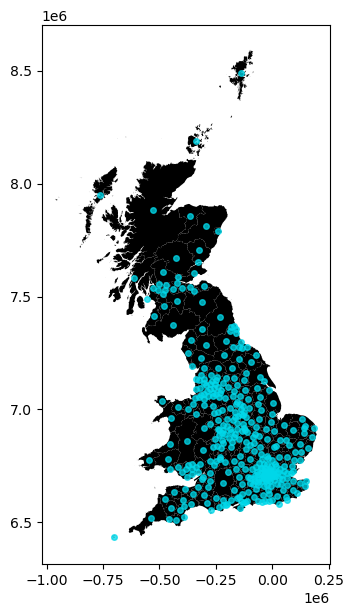

In [61]:
# Lab-04-part-01

# Setup figure
f, ax = plt.subplots(1, figsize=(7, 7))
# Plot base layer of polygons
dataset.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon:
# focus = dataset.loc[['neighbor_ID'], ['geometry']]

# Plot focal polygon:
# focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors:
# w_dist10kmC = weights.DistanceBand.from_dataframe(dataset, 10000, binary=False) # threshold to 10000 means 10km
# neis = dataset.loc[list(w_dist10kmC['neighbor_ID']), :]
# neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Plot 1km buffer:
# buf = focus.centroid.buffer(1000)
# buf.plot(edgecolor='red', facecolor='none', ax=ax)

# Plot centroids of neighbor:
# pts = np.array([(pt.x, pt.y) for pt in dataset.centroid])
# ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        # linewidth=0, alpha=0.75, marker='o', markersize=4)

# Title
# f.suptitle("Neighbors within 1km of `E01006690`")

# Style, zoom and display on screen
# ax.set_ylim(388000, 393500) #/ax.set_ylim(dataset.total_bounds[1], dataset.total_bounds[3]) 
# ax.set_xlim(336000, 339500) #/ax.set_xlim(dataset.total_bounds[0], dataset.total_bounds[2])

import numpy as np

# Plot centroids of neighbor
pts = np.array([(pt.x, pt.y) for pt in dataset.centroid])
ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        linewidth=0, alpha=0.75, marker='o', markersize=4)

Visualizing Neighborhood

In [54]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

c:\Users\Admin\.conda\envs\gds\lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


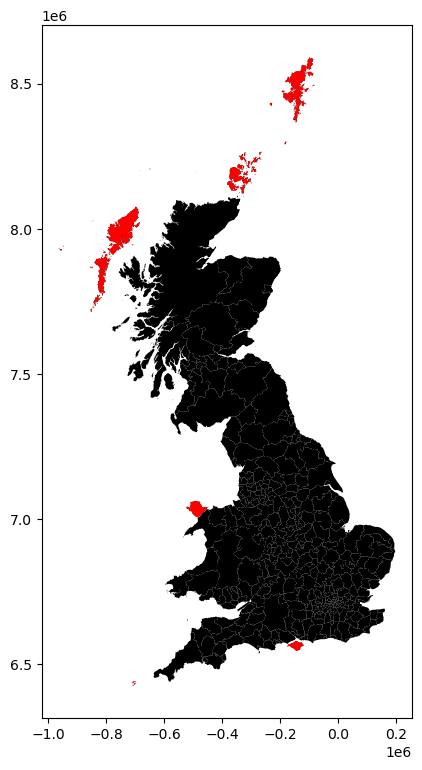

In [62]:
# plot isolate districts
ax = dataset.plot(color='k', figsize=(9, 9))
dataset.loc[w.islands, :].plot(color='red', ax=ax);

In [63]:
# drop isolate neighbors
dataset = dataset.drop(w.islands)

In [64]:
# Create the spatial weights matrix
# NOTE: this might take a few minutes as the geometries are
#       are very detailed
%time w = weights.Queen.from_dataframe(dataset, idVariable='LAD14CD')

<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.


CPU times: total: 984 ms
Wall time: 7.61 s


In [65]:
# Row standardize the matrix
w.transform = 'R'

Moran Plot

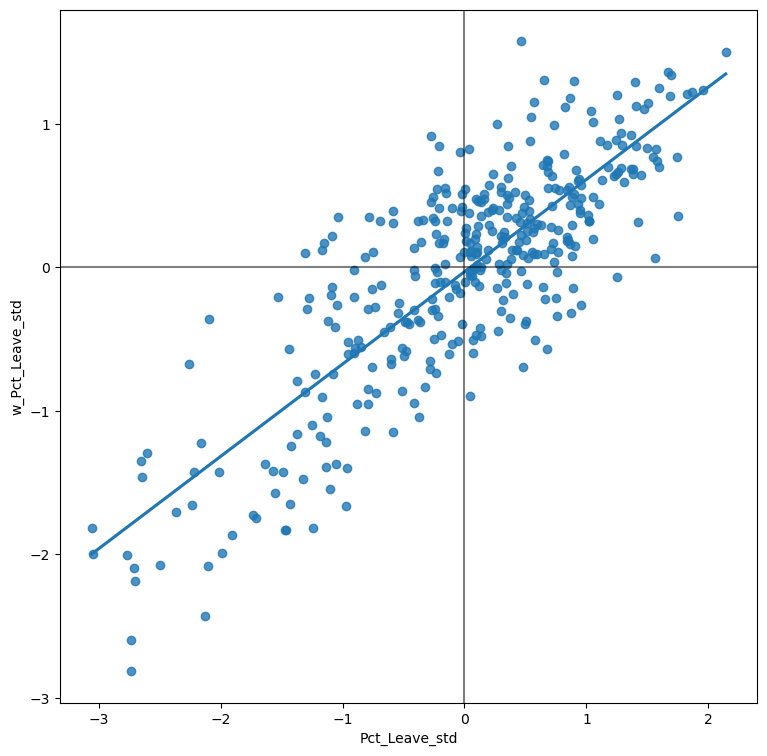

In [67]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot values
dataset['Pct_Leave_std'] = (dataset['Pct_Leave'] - dataset['Pct_Leave'].mean()) / dataset['Pct_Leave'].std()
dataset['w_Pct_Leave_std'] = weights.lag_spatial(w, dataset['Pct_Leave_std'])
sns.regplot(x='Pct_Leave_std', y='w_Pct_Leave_std', data=dataset, ci=None)

# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

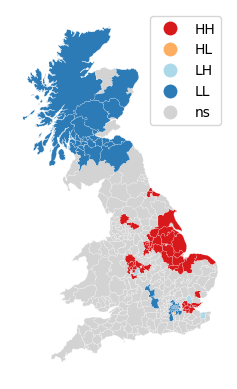

In [68]:
# Calculate spatial weight matrix
# w = weights.Queen.from_dataframe(dataset)

lisa = esda.Moran_Local(dataset['Pct_Leave'], w)

# Break observations into significant or not
dataset['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
dataset['quadrant'] = lisa.q

lisa_cluster(lisa, dataset);

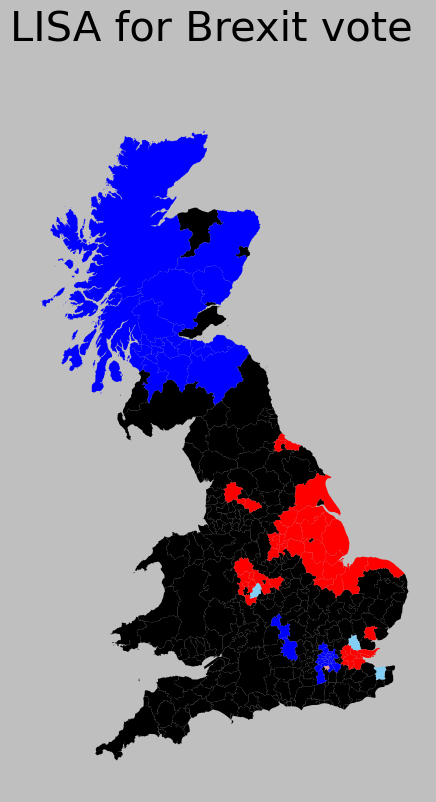

In [69]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot insignificant clusters
ns = dataset.loc[dataset['significant']==False, 'geometry']
ns.plot(ax=ax, color='k')
# Plot HH clusters
hh = dataset.loc[(dataset['quadrant']==1) & (dataset['significant']==True), 'geometry']
hh.plot(ax=ax, color='red')
# Plot LL clusters
ll = dataset.loc[(dataset['quadrant']==3) & (dataset['significant']==True), 'geometry']
ll.plot(ax=ax, color='blue')
# Plot LH clusters
lh = dataset.loc[(dataset['quadrant']==2) & (dataset['significant']==True), 'geometry']
lh.plot(ax=ax, color='#83cef4')
# Plot HL clusters
hl = dataset.loc[(dataset['quadrant']==4) & (dataset['significant']==True), 'geometry']
hl.plot(ax=ax, color='#e59696')
# Style and draw
f.suptitle('LISA for Brexit vote', size=30)
f.set_facecolor('0.75')
ax.set_axis_off()
plt.show()

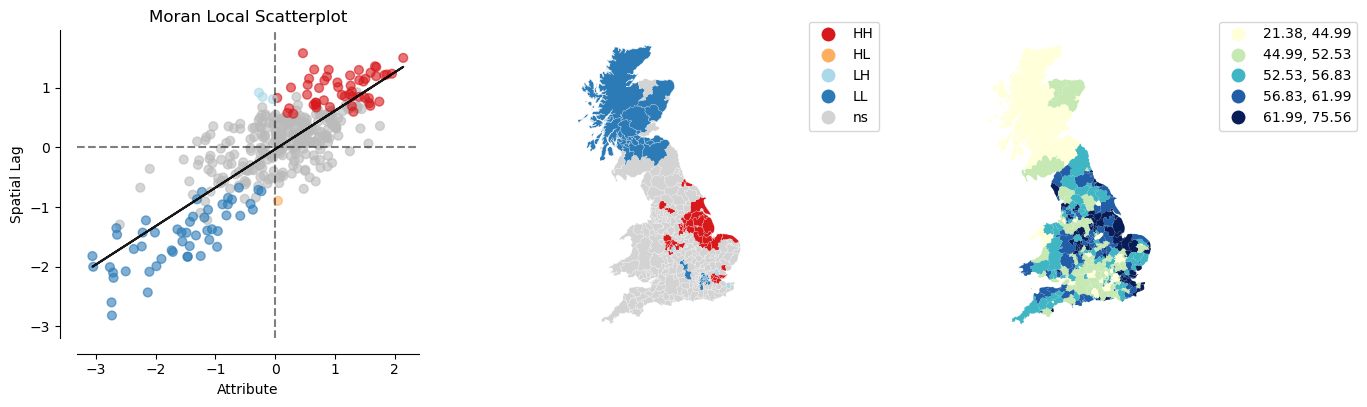

In [71]:
plot_local_autocorrelation(lisa, br, 'Pct_Leave');